# Two Candles, One Cake

### Problem Statement

Suppose that you have a [Battenburg cake](https://en.wikipedia.org/wiki/Battenberg_cake), which is 1 unit long.

You then:
- place two candles at uniform random positions along the length
- uniform randomly cut the cake across the length

*What is the probability that the knife cuts between the two candles?*

```
      #          #
  +---|-----/----|-----+
 /    |    /     |    /|
+---------|----------+ |
|         |          | +
|         |          |/
+---------|----------+
```

### Problem History

I originally saw this problem presented by Ben Sparks on Numberphile https://www.youtube.com/watch?v=FkVe8qrT0LA. 

However this problem has appeared before that video e.g. https://www.newscientist.com/article/mg24232361-100-puzzle-09-the-cake-and-the-candles/

## Problem Statement

Let:
- $C_1$, $C_2 \sim U(0,1)$ be the candle positions
- $K \sim U(0,1)$ be the knife position

We are interested in the probability of the knife landing between the two candles, which I denote as

$$P(C_{1,2} < K < C_{1,2}) = P(C_1 < K < C_2) + P(C_2 < K < C_1).$$

## Solution

The relative likelihood of observing a specific combination of values is given by the joint density

$$f_{K,C_1,C_2}(k, c_1, c_2) = p_K(k) p_{C_1}(c_1) p_{C_2}(c_2).$$

where $p_{K}$ is the probability density function of variable $K$, likewise for $C_1$ and $C_2$.

Therefore 

$$P(C_1 < K < C_2) = \int_{0}^{1} \int_{0}^{k} \int_{k}^{1} p_K(k) p_{C_1}(c_1) p_{C_2}(c_2) \,\, dc_2 \, dc_1 \, dk .  $$

since we are interested in the condition of $C_1 < K$ so we integrate over the region where this is true i.e. $[0, k]$ and likewise for $K < C_2$ where the region is $[k, 1]$.

Furthermore it is equally likely that the knife lands between the candles in both orientations, since $C_1$, $C_2$ and $K$ are $\sim U(0,1)$ and independent, i.e.

$$P(C_1 < K < C_2) = P(C_2 < K < C_1).$$

Therefore

$$P(C_{1,2} < K < C_{1,2}) = 2 \cdot P(C_1 < K < C_2).$$

### Simplifying

The integral can be further simplified since we know $p_k = p_{C_1} = p_{C_2} = 1$ as all three variables are uniform distributed between 0 and 1. Therefore

$$P(C_1 < K < C_2) = \int_{0}^{1} \int_{0}^{k} \int_{k}^{1} 1 \,\, dc_2 \, dc_1 \, dk .  $$

### Solving by Hand

To solve the integral, we can resolve integrals from the inside out.

The integral over $C_2$ is:

$$ \int_{c_2=k}^{c_2=1} 1 \,\, dc_2 = [c_2]_{c_2 = k}^{c_2 =1} = 1 - k$$

The integral over $C_1$ is:

$$ \int_{c_1=0}^{c_1=k} (1-k) \,\, dc_1 = (1-k) \int_0^k \,\, dc_1 = (1-k)[c_2]_{c_2=0}^{c_2=k} = (1-k)(k-0) = (1-k)k$$

The integral over $K$ is:

$$ \int_{k=0}^{k=1} (1-k)k \,\, dk = \int_{k=0}^{k=1} (k-k^2) \,\, dk = \left[\frac{k^2}{2} - \frac{k^3}{3} \right]_{k=0}^{k=1} = \frac{1}{2} - \frac{1}{3} = \frac{1}{6}$$

Therefore 

$$P(C_1 < K < C_2)=\frac{1}{6}$$

and 

$$P(C_{1,2 } < K < C_{1,2}) = 2 \cdot \frac{1}{6} = \frac{1}{3}$$

## Numeric Integration

In [1]:
import numpy as np
from scipy.integrate import nquad

k_limits = (0, 1)

def c1_limits(k):
    return (0, k)

def c2_limits(c1, k):
    return (k, 1)

def integrand(c2, c1, k):
    return 1

result, error = nquad(integrand, [c2_limits, c1_limits, k_limits])

result*2

0.33333333333333337

#  Simulation

For a sanity check I simulated the problem.

In [2]:
from scipy.stats import uniform
import numpy as np

np.random.seed(0)

n_rvs = 1000000
rvs_c1 = uniform.rvs(size=n_rvs)
rvs_c2 = uniform.rvs(size=n_rvs)
rvs_ck = uniform.rvs(size=n_rvs)

way1 = (rvs_c1 < rvs_ck) & (rvs_c2 > rvs_ck)
way2 = (rvs_c1 > rvs_ck) & (rvs_c2 < rvs_ck)

total = way1 | way2
np.sum(total)/n_rvs

0.333836

# Visualisation

This is a replication of the visualisation from the Numperphile video.

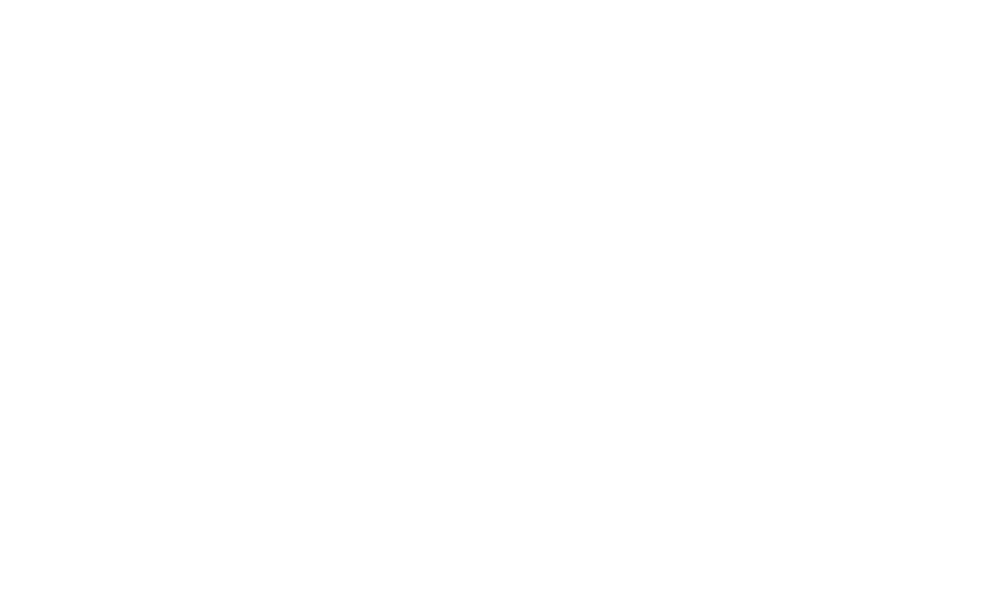

In [3]:
import numpy as np
import plotly.graph_objects as go

num_points = 50000
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)
z = np.random.uniform(0, 1, num_points)

condition = ((x > y) & (x < z)) | ((x < y) & (x > z))

x_region = x[condition]
y_region = y[condition]
z_region = z[condition]

fig = go.Figure(data=[go.Scatter3d(
    x=x_region,
    y=y_region,
    z=z_region,
    mode='markers',
    marker=dict(
        size=2,
        color='blue',
        opacity=0.5
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        zaxis=dict(range=[0, 1]),
    ),
    width=800,
    height=600,
)

# Show the plot
fig.show()
